# Notebook to create mean values (reading data from the created files)

## Importing

In [5]:
import xarray as xr

import matplotlib.pyplot as plt


## Plotting

In [6]:
def plotting(variable,year_variable,title,y_label):
    
    fig, ax = plt.subplots()

    scatter= ax.scatter(dataset.time_counter.values,variable, marker='.', c=dataset.time_counter.dt.month)
    plt.ylabel(y_label)
    
    ax.legend(handles=scatter.legend_elements()[0], labels=['February','March','April'])
    ax.plot(dataset.isel(time_counter=(dataset.time_counter.dt.month == 2) & 
        (dataset.time_counter.dt.day == 15)).time_counter
        ,year_variable,color='red',marker='*')

    fig.suptitle('Daily Mean ' + title + ' (15 Feb - 30 Apr)')
    fig.show()
    

## Main Body

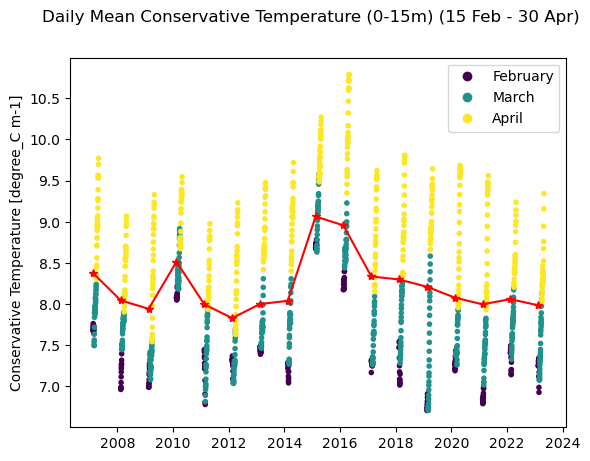

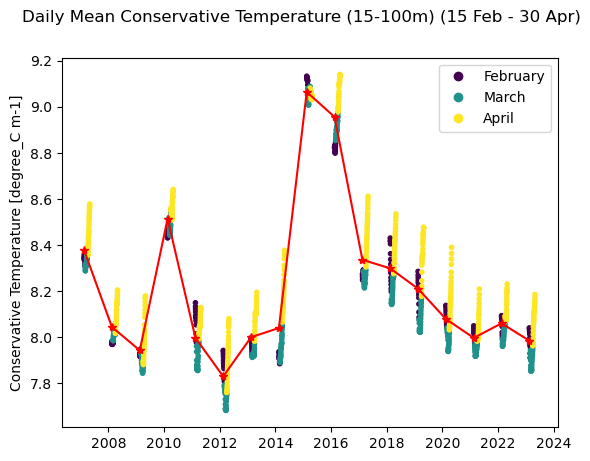

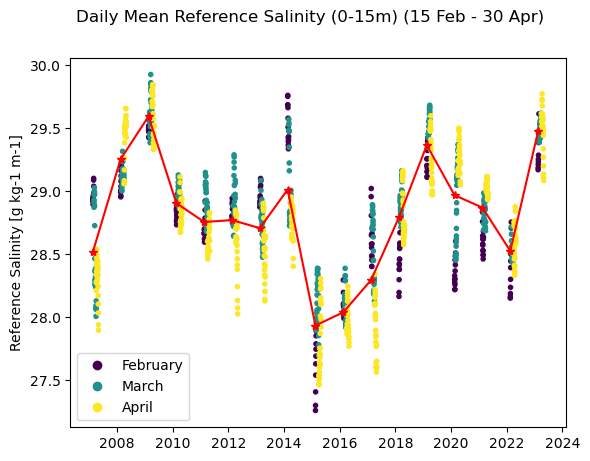

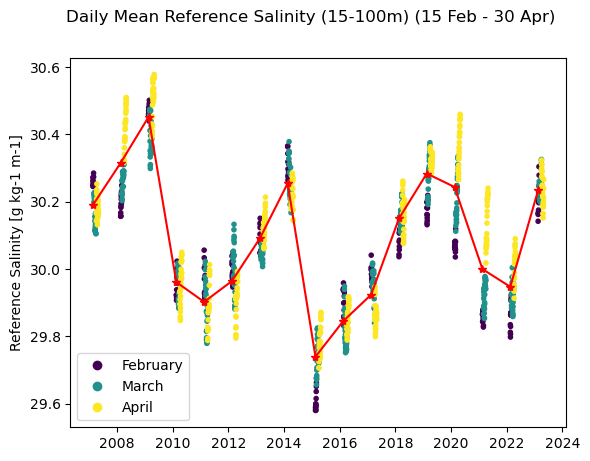

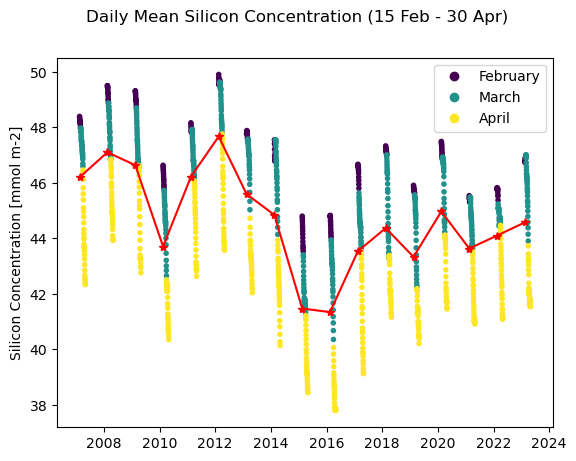

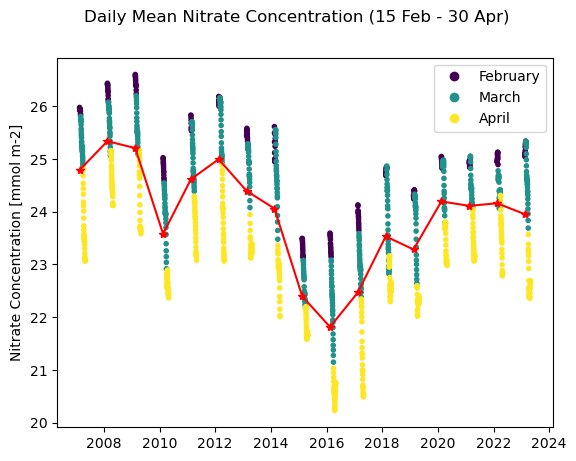

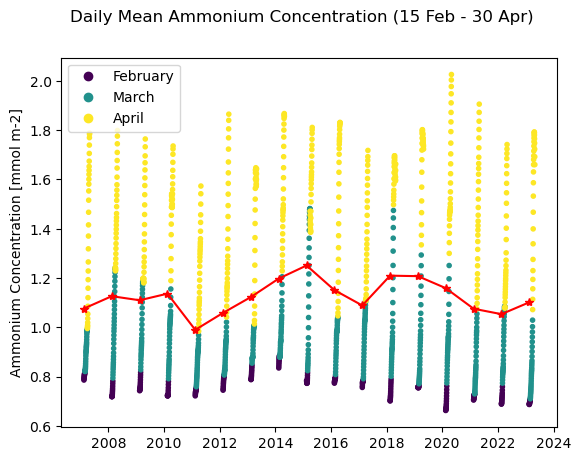

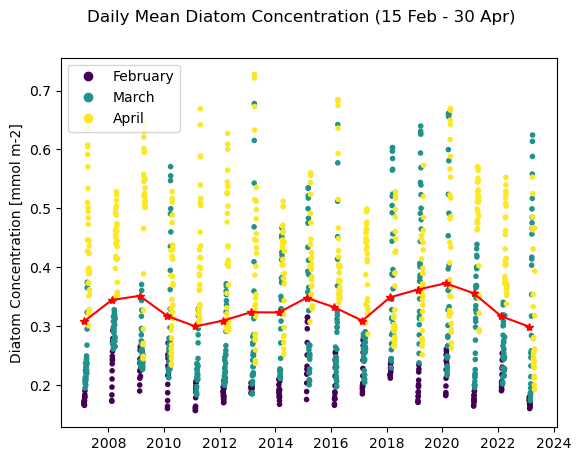

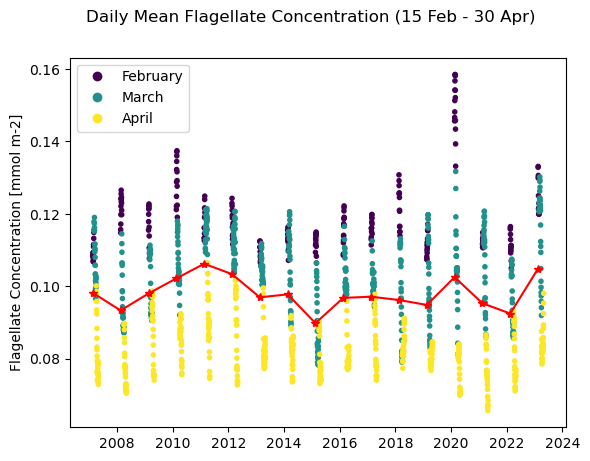

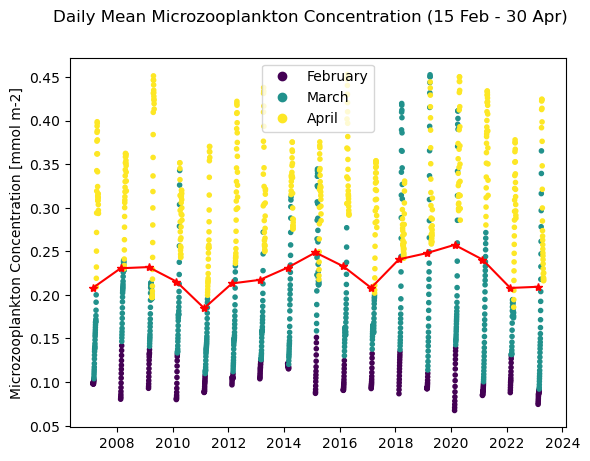

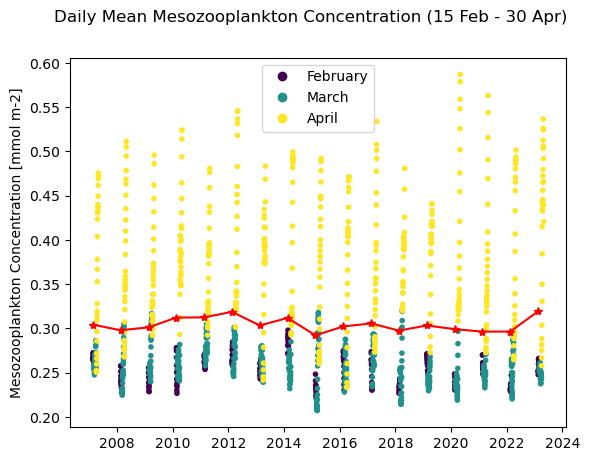

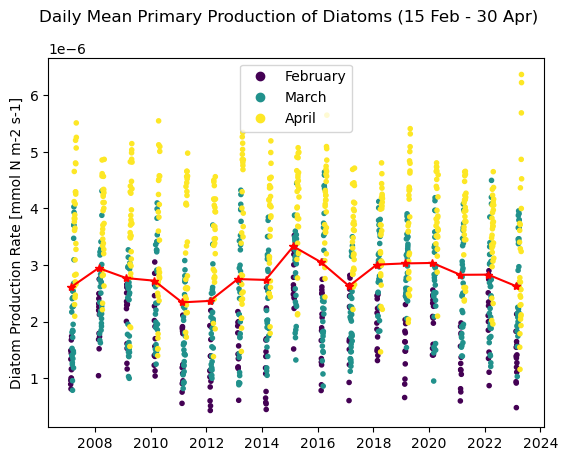

In [7]:
ds = xr.open_dataset('/data/ibougoudis/MOAD/files/integrated_original.nc')
ds2 = xr.open_dataset('/data/ibougoudis/MOAD/files/integrated_model_var_old.nc')

dataset = ds.mean(['x','y'])
diat_prod_mean = ds2.Diatom_Production_Rate.mean(['x','y'])

# Calculating the monthly means

dataset2 = ds.groupby('time_counter.year').mean('time_counter').mean(['x','y'])
diat_prod_year = ds2.Diatom_Production_Rate.groupby('time_counter.year').mean('time_counter').mean(['x','y'])

# Plotting

plotting(dataset['Temperature_(0m-15m)'], dataset2['Temperature_(15m-100m)'], 'Conservative Temperature (0-15m)','Conservative Temperature [degree_C m-1]')
plotting(dataset['Temperature_(15m-100m)'], dataset2['Temperature_(15m-100m)'],
    'Conservative Temperature (15-100m)', 'Conservative Temperature [degree_C m-1]')
plotting(dataset['Salinity_(0m-15m)'], dataset2['Salinity_(0m-15m)'], 
    'Reference Salinity (0-15m)', 'Reference Salinity [g kg-1 m-1]')
plotting(dataset['Salinity_(15m-100m)'], dataset2['Salinity_(15m-100m)'],
    'Reference Salinity (15-100m)', 'Reference Salinity [g kg-1 m-1]')

plotting(dataset['Silicon'], dataset2['Silicon'], 'Silicon Concentration', 
    'Silicon Concentration [mmol m-2]')
plotting(dataset['Nitrate'], dataset2['Nitrate'], 'Nitrate Concentration', 
    'Nitrate Concentration [mmol m-2]')
plotting(dataset['Ammonium'], dataset2['Ammonium'], 'Ammonium Concentration', 
    'Ammonium Concentration [mmol m-2]')

plotting(dataset['Diatom'], dataset2['Diatom'], 'Diatom Concentration', 
    'Diatom Concentration [mmol m-2]')
plotting(dataset['Flagellate'], dataset2['Flagellate'], 'Flagellate Concentration', 
    'Flagellate Concentration [mmol m-2]')

plotting(dataset['Microzooplankton'], dataset2['Microzooplankton'],
    'Microzooplankton Concentration', 'Microzooplankton Concentration [mmol m-2]')
plotting(dataset['Mesozooplankton'], dataset2['Mesozooplankton'],
    'Mesozooplankton Concentration', 'Mesozooplankton Concentration [mmol m-2]')

plotting(diat_prod_mean, diat_prod_year, 'Primary Production of Diatoms', 
'Diatom Production Rate [mmol N m-2 s-1]')